## Linjär klassificering

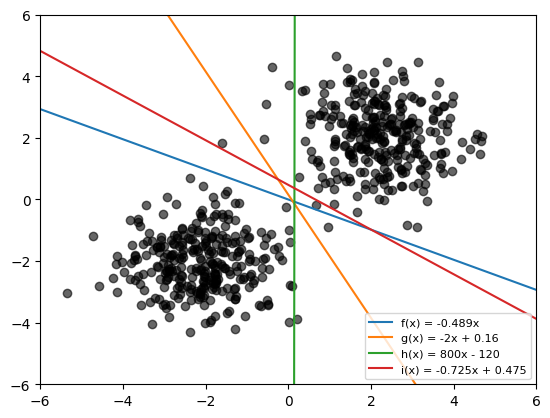

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lab3_utils import f, g, h, calculate_y_on_separator as i, get_unlabelled_points, scatter_classified_point_and_line_for_function

unlabelled_points = get_unlabelled_points()

X = np.linspace(-6, 6)

fig, ax = plt.figure(dpi=100), plt.axes()

ax.plot(X, [f(x) for x in X], label="f(x) = -0.489x")
ax.plot(X, [g(x) for x in X], label="g(x) = -2x + 0.16")
ax.plot(X, [h(x) for x in X], label="h(x) = 800x - 120")
ax.plot(X, [i(x) for x in X], label="i(x) = -0.725x + 0.475")
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.scatter([p[0] for p in unlabelled_points], [p[1] for p in unlabelled_points], alpha=0.6, c="black")
ax.legend(loc="lower right", prop={'size': 8})

plt.show()

Ovan målas alla oklassificerade punkter upp, samt fyra linjer som kan användas för att klassificera punkterna.

i(x) är den linje jag själv valde att dra då den delade punkterna jämnt med 300 på ena sidan om linjen och 300 på andra.

Som man kan se är det en del punkter som klassificeras olika beroende på vilken linje som används.

Man kan även se tydliga områden där det är självklart vilken klassificering det ska bli.

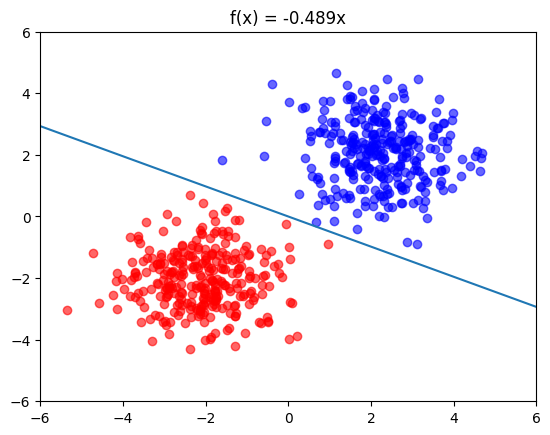

Antal röda: 299
Antal blåa: 301


In [2]:
scatter_classified_point_and_line_for_function(unlabelled_points, f, title="f(x) = -0.489x")

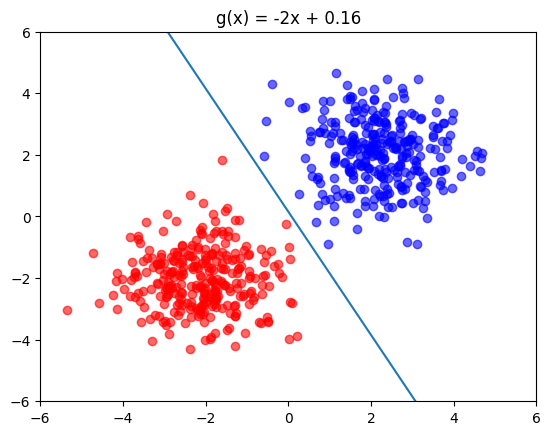

Antal röda: 299
Antal blåa: 301


In [3]:
scatter_classified_point_and_line_for_function(unlabelled_points, g, title="g(x) = -2x + 0.16")

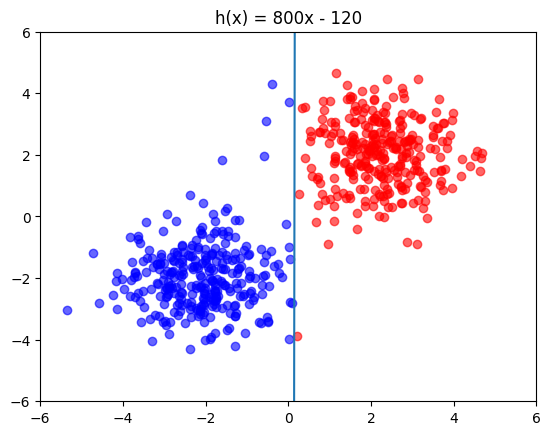

Antal röda: 298
Antal blåa: 302


In [4]:
scatter_classified_point_and_line_for_function(unlabelled_points, h, title="h(x) = 800x - 120")

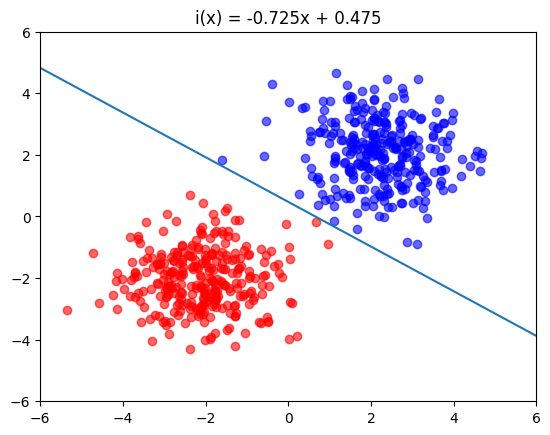

Antal röda: 300
Antal blåa: 300


In [5]:
scatter_classified_point_and_line_for_function(unlabelled_points, i, title="i(x) = -0.725x + 0.475")

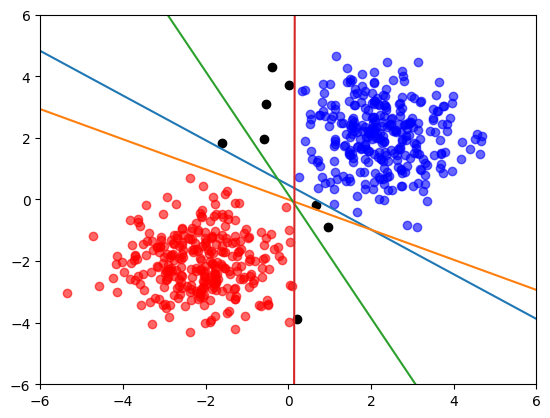

In [6]:
def get_label_by_function(point, function):
    x, y = point
    is_positive_x = function(x+1) > function(x)

    # Måste vända på klassificeringen för att det ska bli samma 
    if is_positive_x:
        return 0 if y > function(x) else 1

    return 1 if y > function(x) else 0

unclassified_points = []
red_points = []
blue_points = []

functions = (f, g, h, i)
for point in unlabelled_points:
    labels = [get_label_by_function(point, function) for function in functions]
    if len(set(labels)) == 1:
        label = labels[0]
        if label == 1:
            blue_points.append(point)
        else:
            red_points.append(point)
    else:
        unclassified_points.append(point)

min_graph_axis_value = -6
max_graph_axis_value = 6

X = np.linspace(min_graph_axis_value, max_graph_axis_value)

fig, ax = plt.figure(dpi=100), plt.axes()

ax.plot(X, [i(x) for x in X])
ax.plot(X, [f(x) for x in X])
ax.plot(X, [g(x) for x in X])
ax.plot(X, [h(x) for x in X])
ax.set_xlim((min_graph_axis_value, max_graph_axis_value))
ax.set_ylim((min_graph_axis_value, max_graph_axis_value))
ax.scatter([p[0] for p in unclassified_points], [p[1] for p in unclassified_points], alpha=1, c="black")
ax.scatter([p[0] for p in red_points], [p[1] for p in red_points], alpha=0.6, c="red")
ax.scatter([p[0] for p in blue_points], [p[1] for p in blue_points], alpha=0.6, c="blue")

# TODO: Legend som beskriver vilken linje som är vilken funktion

# TODO: Gör en återanvändbar funktion som kan användas för att peka ut specifika koordinater. Att jag vill visa t.ex. (1, -2) extra stor

plt.show()

De svarta punkter är sådana som inte har samma klassificering för alla avdelande linjer.

Som vi kan se finns det en del punkter som inte alltid får samma klassificering, men vi kan samtidigt se områden där det är mycket tydligt vilken klassificering punkterna tillhör.

Alla ekvationer/linjer delar punkterna mer eller mindre jämt, men det är en del punkter som skiljer sig i klassifiering beroende på vilken ekvation som används.

Man kan se att det finns områden som är svårare att bestämma klassifiering för, och man kan även se områden där det är helt självklart vilken klassifiering punkten tillhör.

När h(x) används för att klassificera data går det inte att beräkna på samma sätt.
Alla andra ekvationer har en negativ lutning (negativt x), medan denna har positivt.
Då kan vi inte beräkna att högre y-värde för ekvationen än punkten har ska räknas som höger om linjen, så som vi kan göra med de andra.

Vilken linje som skulle vara bäst kan vara svårt att avgöra. Det kan bero på vad det är för data vi har och vilka faktorer som är x och y i detta fall. Med h(x) kan man säga i detta fall att data klassificeras till vänster eller höger. Det kan vara ett bra alternativ, men en punkt på (1, -2), ska den verkligen klassificeras som blå när den ligger ser ut att tillhöra den röda gruppen?